## Individual year plots across all isentropic levels

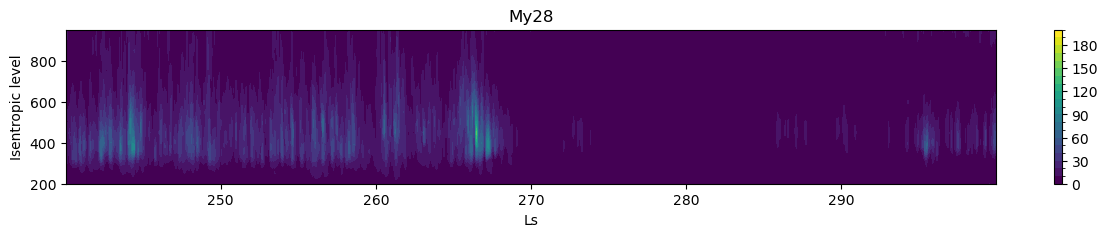

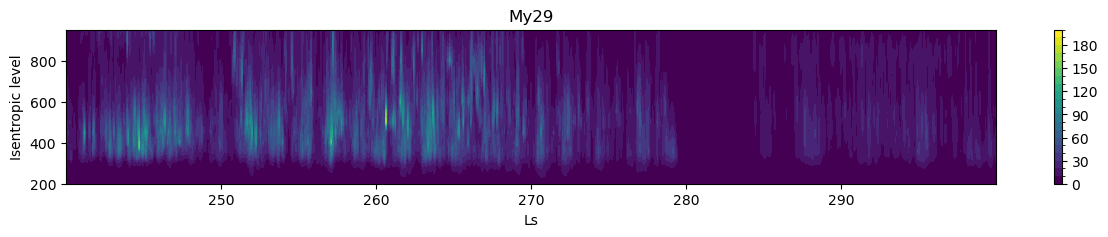

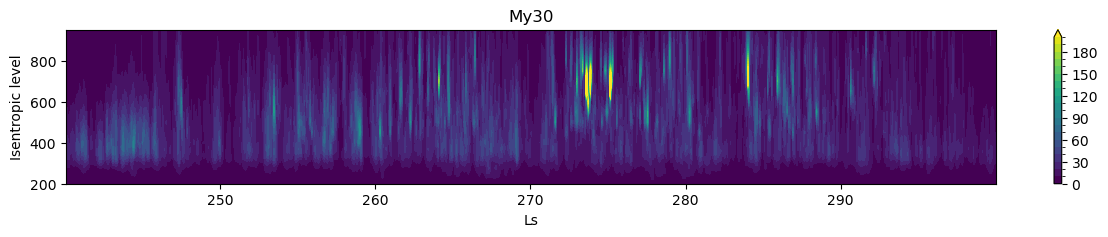

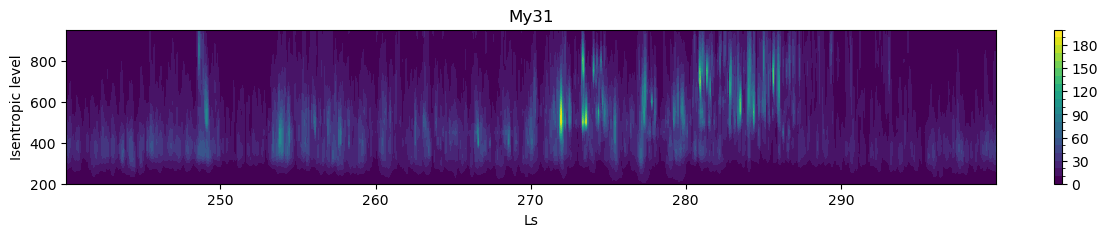

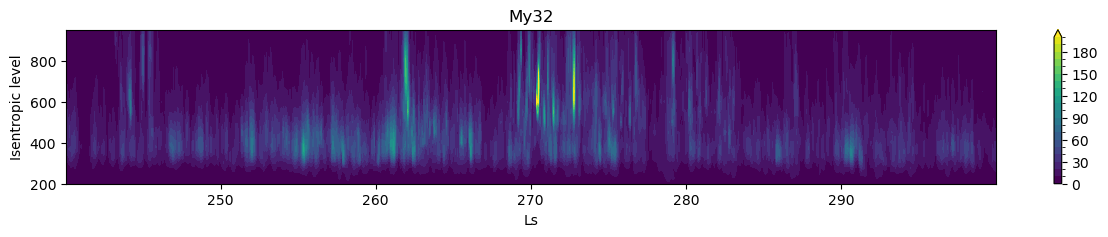

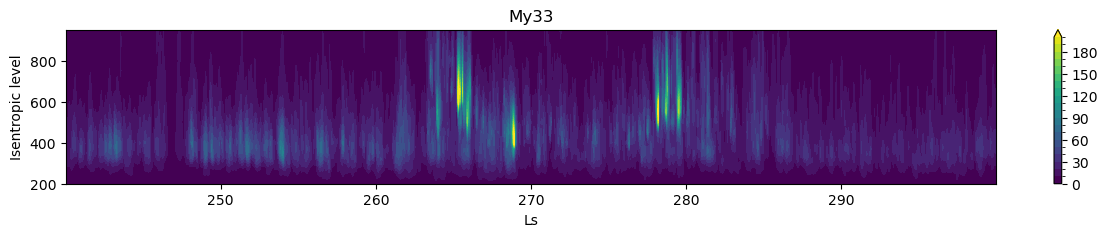

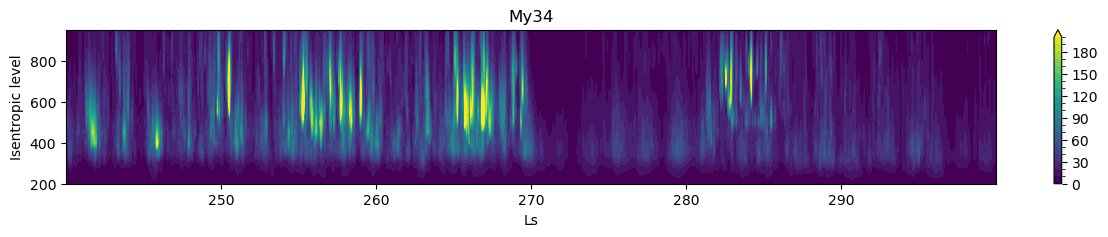

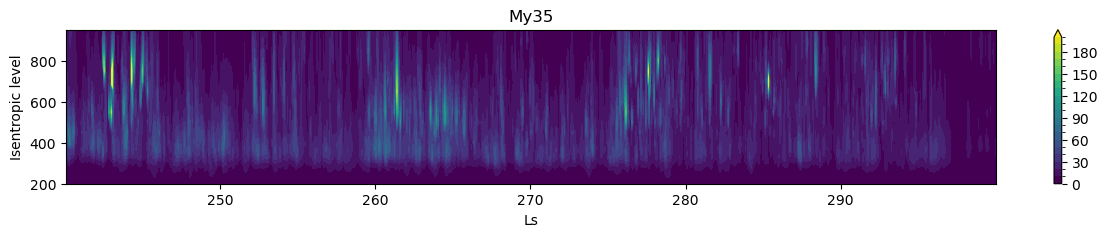

In [60]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    daw = da.where(240 <= da.Ls, drop = True).where(da.Ls <= 300, drop = True)
    plt.figure(figsize = (15, 2))
    daw.plot.contourf(x='Ls', levels = 21, vmin = 0, vmax = 200)
    plt.xlabel('Ls')
    plt.ylabel('Isentropic level')
    plt.title('My%02d' %(year))
    plt.savefig(path + '/Plots/isen_my%02d.pdf' %(year))
    #plt.
    #if i == 0:
    #    d = da
    #else:
    #    d = xr.concat([d, da], dim = 'time')
    #i+=1

#plt.figure(figsize = (24, 8))
#X, Y = np.meshgrid(d.time, d.level)
#plt.scatter(X, Y, c = d.values, cmap = 'RdBu_r', marker = 'x')
#plt.savefig(path + '/Plots/plot.pdf')

## Subplots across all isentropic levels

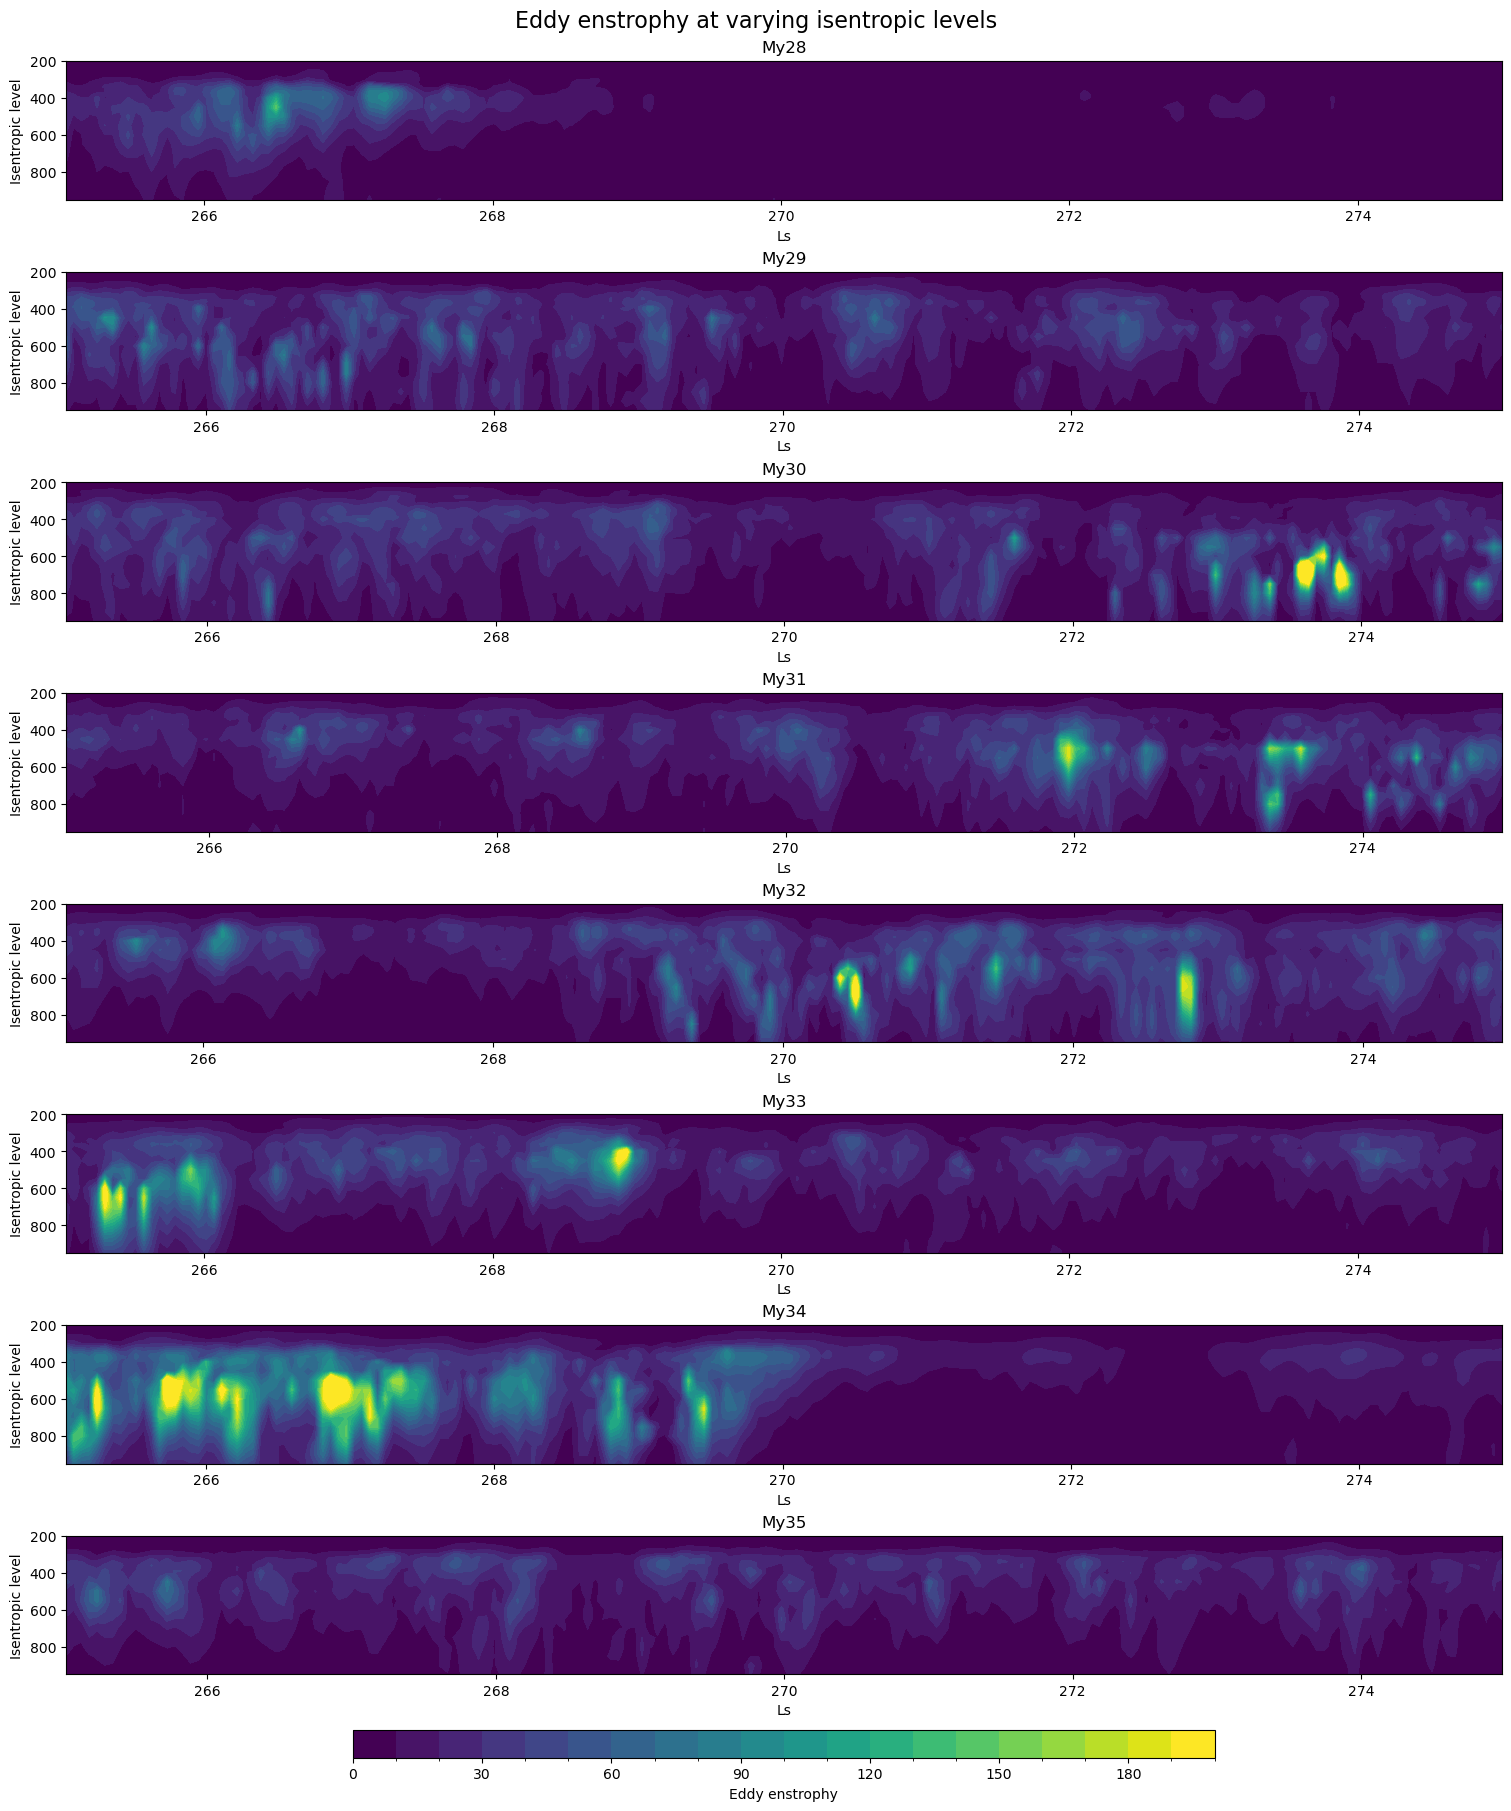

In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
fig, axs = plt.subplots(8,1, figsize = (15,18), layout = 'constrained')
fig.suptitle('Eddy enstrophy at varying isentropic levels', fontsize = 16)
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    daw = da.where(250 <= da.Ls, drop = True).where(da.Ls <= 290, drop = True)
    plot = daw.plot.contourf(x='Ls', levels = 21, vmin = 0, vmax = 200, ax = axs[i], add_colorbar=False)
    axs[i].set_xlabel('Ls')
    axs[i].set_ylabel('Isentropic level')
    axs[i].set_title('My%02d' %(year))
    axs[i].invert_yaxis()
    i+=1
cax = axs[-1].inset_axes([0.2, -0.6, 0.6, 0.2])
cbar = fig.colorbar(plot, cax=cax, orientation='horizontal')
#cbar = fig.colorbar(plot, ax=axs[:], orientation='horizontal', shrink = 0.3, location = 'bottom')
cbar.set_label('Eddy enstrophy')
#fig.subplots_adjust(top=0.96)
#plt.savefig(path + '/Plots/isen_all_snip.pdf')

## Subplot time series at chosen isentropic level

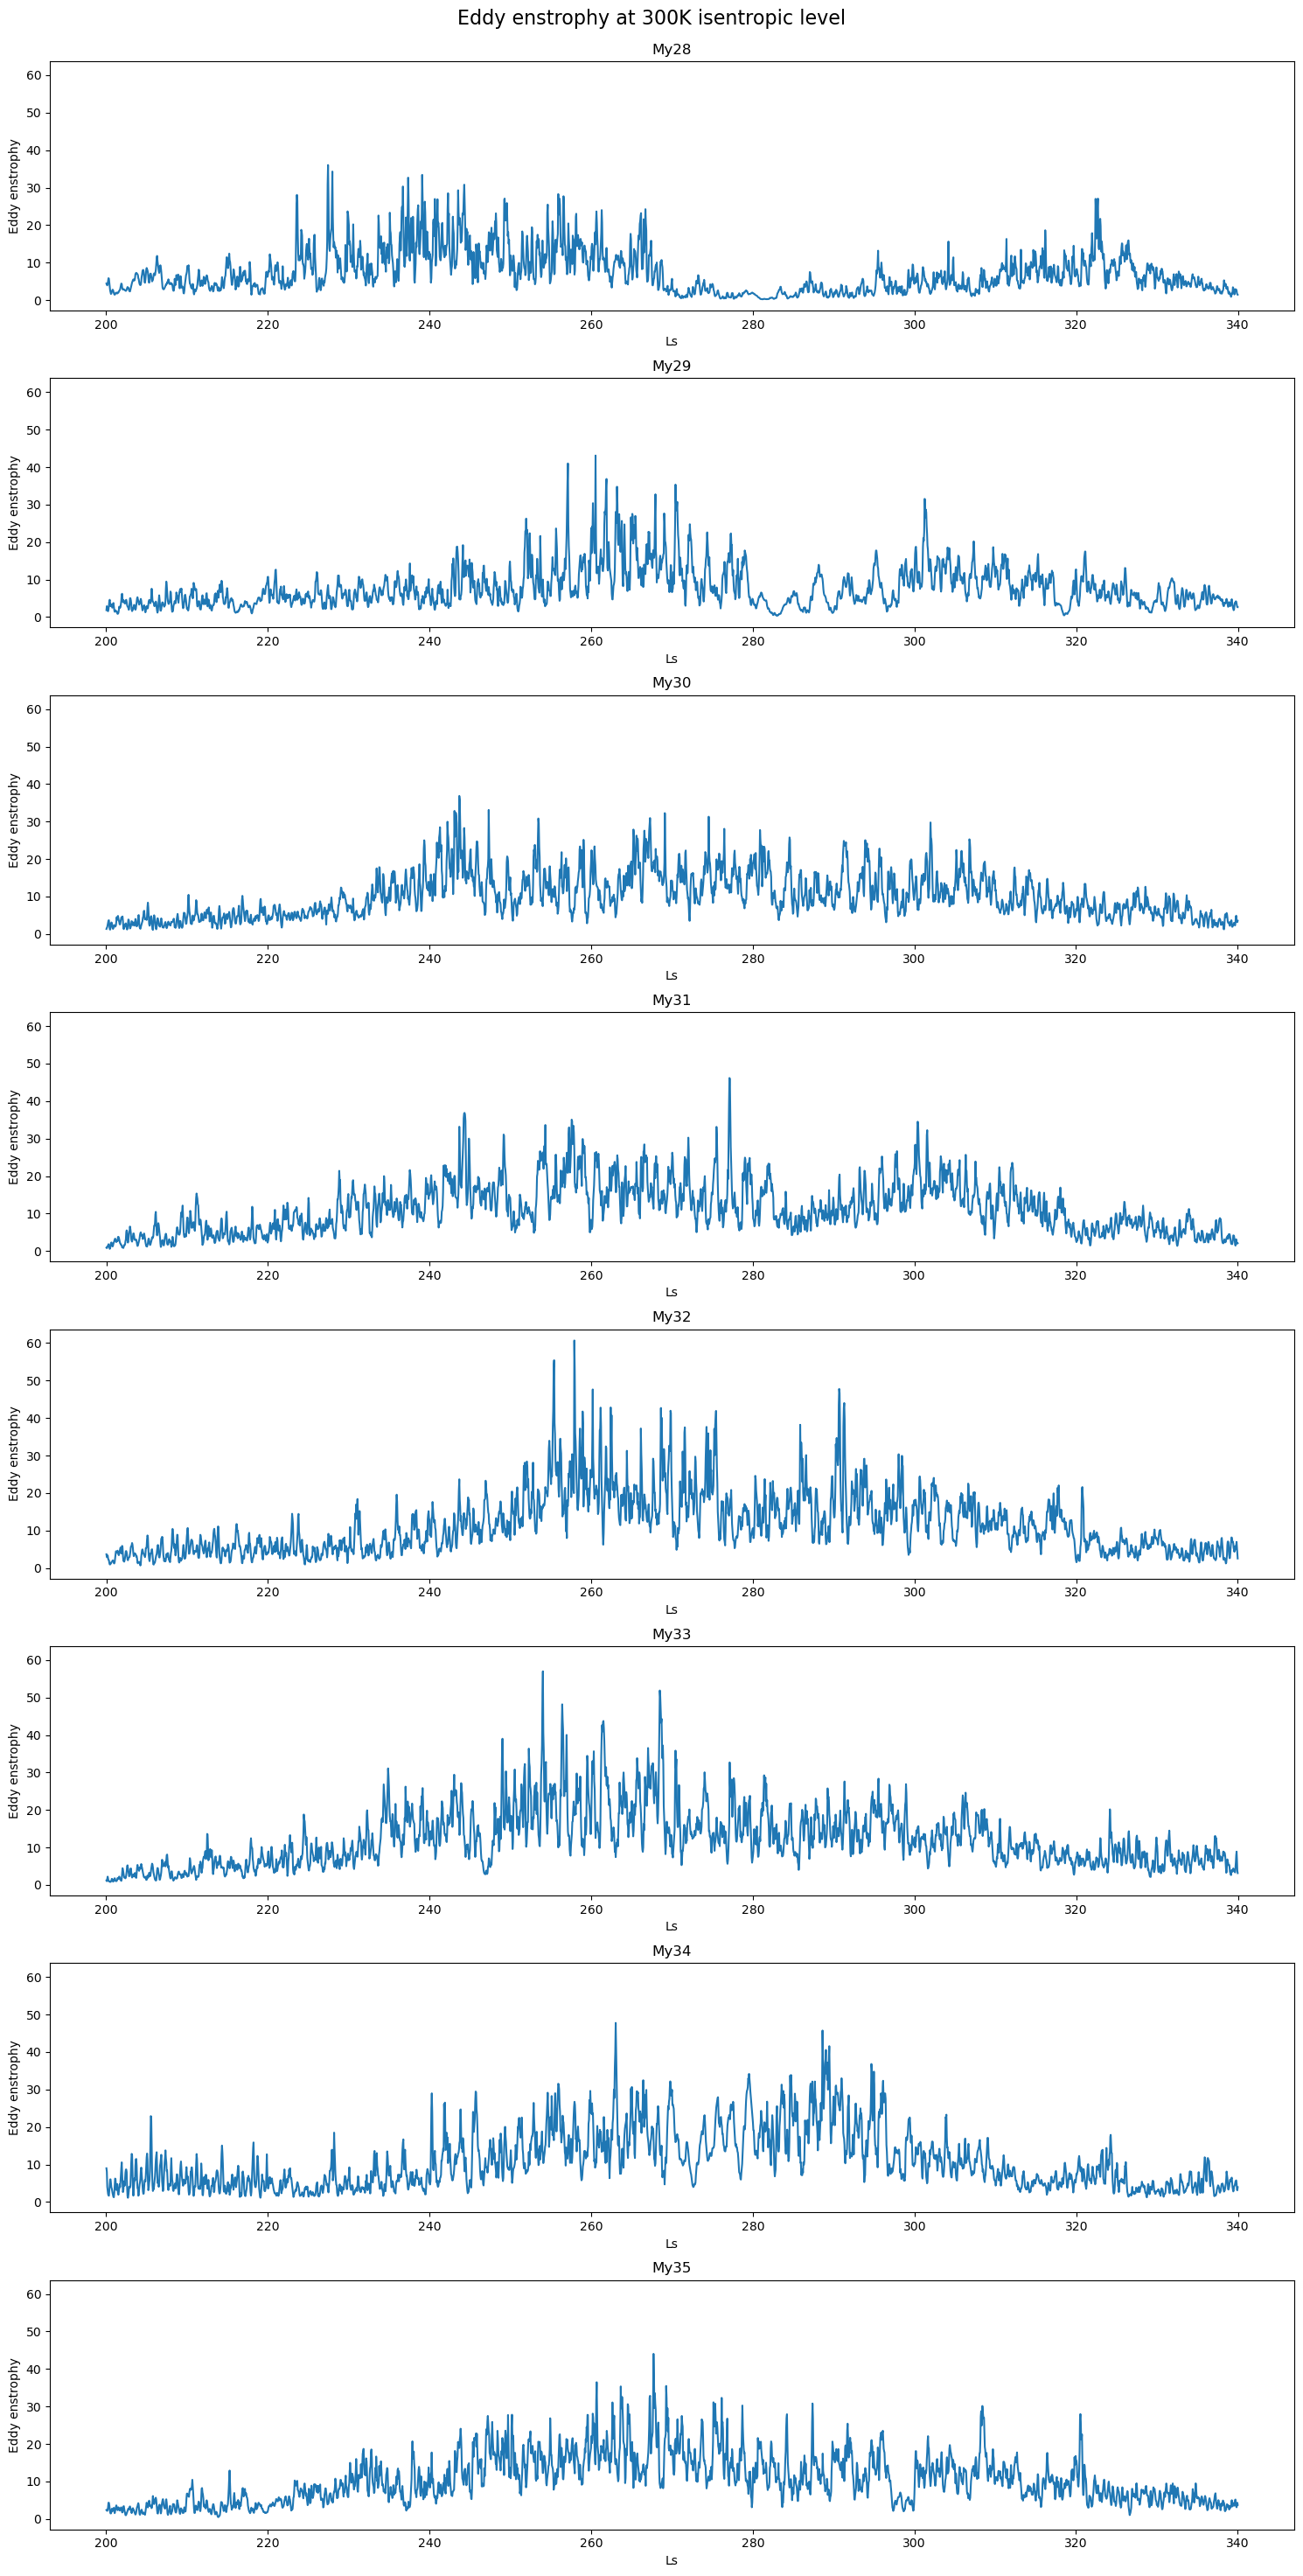

In [36]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 300

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
fig, axs = plt.subplots(8,1, figsize = (15,30), sharey = True)
fig.suptitle('Eddy enstrophy at %03dK isentropic level' %(islev), fontsize = 16)
for year in years:
    da = xr.open_dataarray(path + 'lev000_my%02d.nc' %(year))
    da = da.assign_coords({'MY':year})
    daw = da.where(200 <= da.Ls, drop = True).where(da.Ls <= 340, drop = True).where(da.level == islev, drop = True)
    plot = axs[i].plot(daw.Ls, daw.values)
    #plot = axs[i].scatter(daw.Ls, daw.values, marker = 'x', s = 0.5)
    axs[i].set_xlabel('Ls')
    axs[i].set_ylabel('Eddy enstrophy')
    axs[i].set_title('My%02d' %(year))
    i+=1
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.savefig(path + '/Plots/lev%03d_scatter_all.pdf' %(islev))

### Each isentropic level - scatter plot with colour and size controlled by value

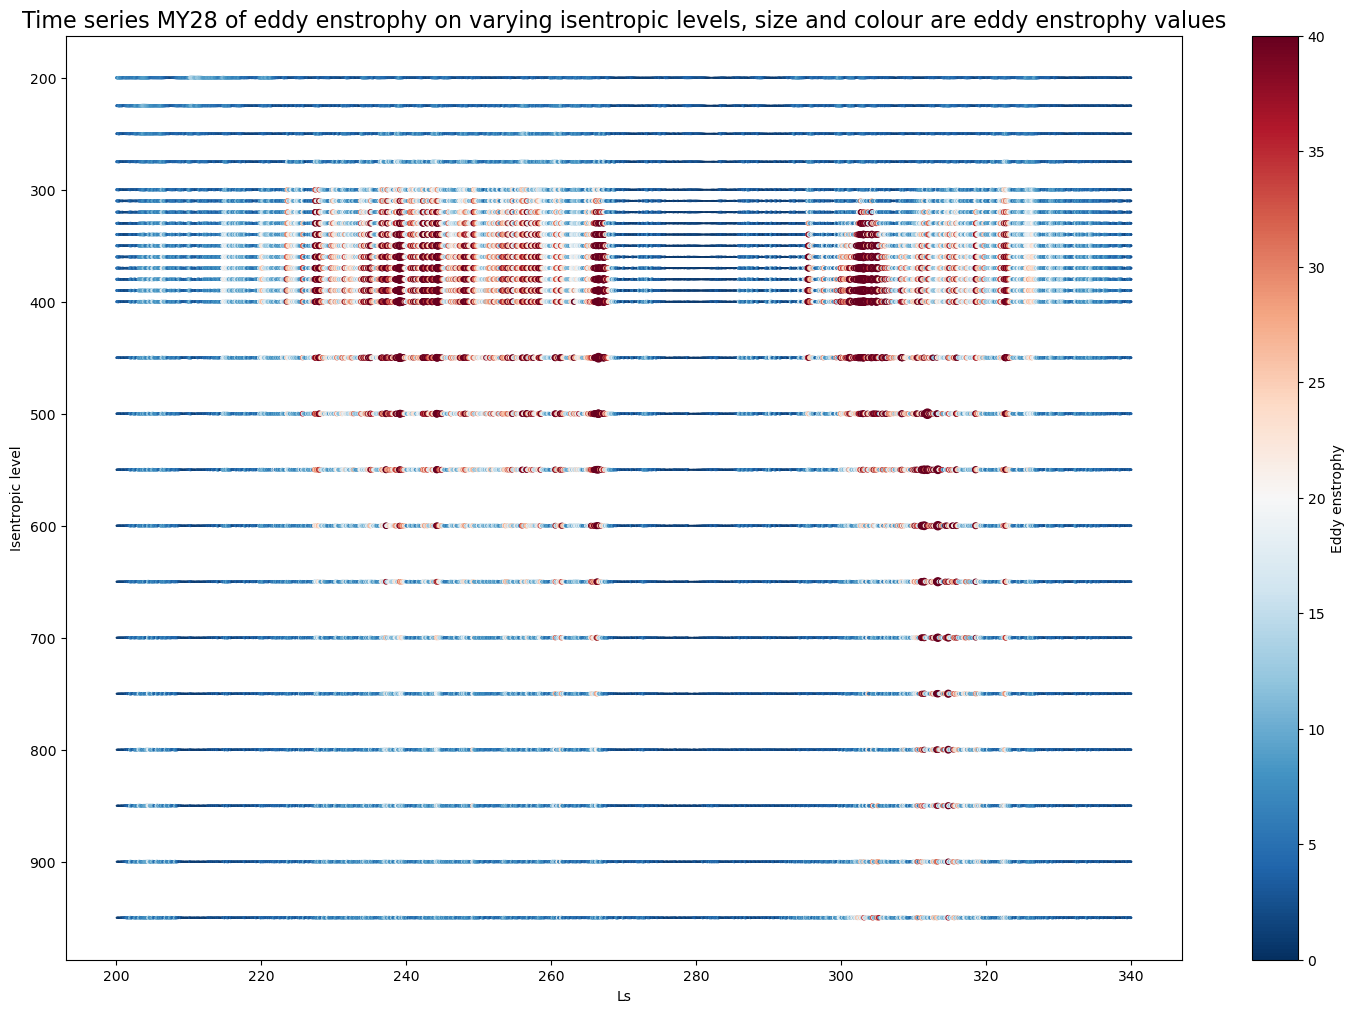

In [113]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000

years = [28]#, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    daw = da.where(200 <= da.Ls, drop = True).where(da.Ls <= 340, drop = True)
plt.figure(figsize = (18,12))
for lev in daw.level:
    plt.scatter(x = daw.Ls, y = [lev] * len(daw.Ls), s = (daw.where(daw.level == lev, drop = True)), marker = '.',
                c = daw.where(daw.level == lev, drop = True), vmin = 0, vmax = 40, cmap = 'RdBu_r')
plt.gca().invert_yaxis()
plt.colorbar(label = 'Eddy enstrophy')
plt.title('Time series MY%02d of eddy enstrophy on varying isentropic levels, size and colour are eddy enstrophy values' %(daw.MY),
          fontsize = 16)
plt.xlabel('Ls')
plt.ylabel('Isentropic level')
plt.savefig(path + '/Plots/isenscatter_all_MY%02d.pdf' %(daw.MY))

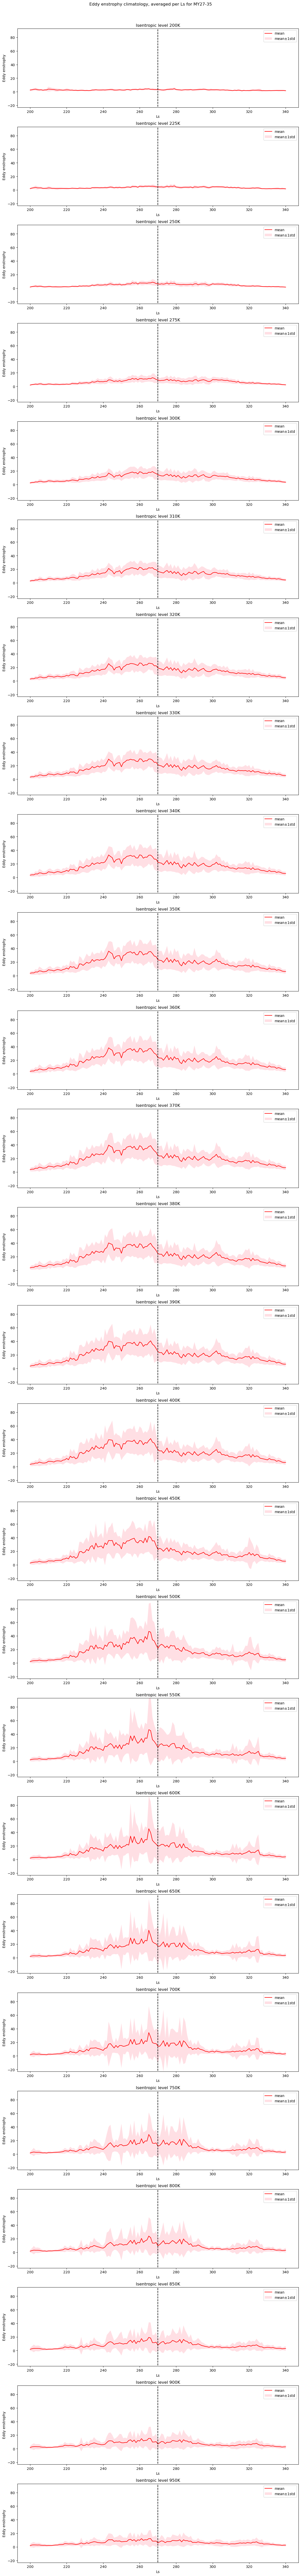

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000
Lsmin = 200
Lsmax = 340

years = [27, 28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    #daw = da.where(Lsmin <= da.Ls, drop = True).where(da.Ls <= Lsmax, drop = True)
    da['Ls_int'] = np.floor(da['Ls'])
    if i == 0:
        d = da
    else:
        d = xr.concat([d, da], dim = 'time')
    i+=1
d1_mean = d.groupby('Ls_int').mean()
d1_std = d.groupby('Ls_int').std()
d1_mean = d1_mean.to_dataset(name = 'eemean')
d1_std = d1_std.to_dataset(name = 'eestd')
d1 = xr.merge([d1_mean, d1_std])
d1['upper'] = d1.eemean + d1.eestd
d1['lower'] = d1.eemean - d1.eestd
fig, axs = plt.subplots(len(d1.level), 1, figsize = (12, 4 * len(d1.level)), sharey = True)
plt.suptitle('Eddy enstrophy climatology, averaged per Ls for MY27-35', fontsize = 12)
j = 0
axs[j].set_ylim(top = 93, bottom = -23)
for lev in d1.level:
    d2 = d1.where(d1.level == lev, drop = True)
    d2 = d2.where(Lsmin <= d2.Ls_int, drop = True).where(d2.Ls_int <= Lsmax, drop = True)
    plot = axs[j].plot(d2.Ls_int, d2.eemean[:,0], color = 'red', label = 'mean')
    shade = axs[j].fill_between(d2.Ls_int, d2.lower[:,0], d2.upper[:,0],
                                color = 'pink', alpha = 0.5, edgecolor = 'None', label = 'mean±1std')
    dash = axs[j].plot([270, 270], [-100, 800], '--', color = 'black')
    axs[j].set_xlabel('Ls')
    axs[j].set_ylabel('Eddy enstrophy')
    axs[j].set_title('Isentropic level %03dK' %(lev))
    axs[j].legend()
    j+=1
fig.tight_layout()
fig.subplots_adjust(top=0.97)
#plt.savefig(path + '/Plots/climatology_Ls%03d-%03d.pdf' %(Lsmin, Lsmax))
#plt.figure(figsize = (12, 8))
#plt.plot(d1.Ls_int, d1.eemean[:,4], color = 'red')
#plt.fill_between(d1.Ls_int, d1.lower[:,4], d1.upper[:,4],
                 #color = 'pink', alpha = 0.5, edgecolor = 'None')

In [30]:
d3 = d2.where(d2.Ls_int <=300, drop = True).where(d2.Ls_int >= 240, drop = True)

In [8]:
d3 = d2.drop_dims('level')
d3

<xarray.Dataset>
Dimensions:  (Ls_int: 360)
Coordinates:
  * Ls_int   (Ls_int) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    *empty*

In [13]:
d1['mean']

<xarray.DataArray 'mean' (Ls_int: 360, level: 26)>
array([[1.80740963, 2.86449146, 2.8452729 , ..., 1.74992105, 1.9808324 ,
        1.75621273],
       [1.6866842 , 2.86713235, 2.94103402, ..., 1.68221716, 1.902001  ,
        1.80809473],
       [1.92950359, 3.05224368, 2.90075896, ..., 1.16077832, 1.35918504,
        1.29154623],
       ...,
       [2.10373483, 2.94928833, 2.41649359, ..., 1.31469896, 1.452064  ,
        1.37840859],
       [1.81271715, 2.50900128, 2.12238033, ..., 1.44435515, 1.58056704,
        1.46019779],
       [2.09349289, 2.6038608 , 1.91760557, ..., 1.45538642, 1.59702573,
        1.46674249]])
Coordinates:
  * level    (level) float64 200.0 225.0 250.0 275.0 ... 800.0 850.0 900.0 950.0
  * Ls_int   (Ls_int) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0

In [144]:
d1 = d.groupby('Ls_int').mean()

In [145]:
d1

<xarray.DataArray (Ls_int: 360, level: 26)>
array([[1.80740963, 2.86449146, 2.8452729 , ..., 1.74992105, 1.9808324 ,
        1.75621273],
       [1.6866842 , 2.86713235, 2.94103402, ..., 1.68221716, 1.902001  ,
        1.80809473],
       [1.92950359, 3.05224368, 2.90075896, ..., 1.16077832, 1.35918504,
        1.29154623],
       ...,
       [2.10373483, 2.94928833, 2.41649359, ..., 1.31469896, 1.452064  ,
        1.37840859],
       [1.81271715, 2.50900128, 2.12238033, ..., 1.44435515, 1.58056704,
        1.46019779],
       [2.09349289, 2.6038608 , 1.91760557, ..., 1.45538642, 1.59702573,
        1.46674249]])
Coordinates:
  * level    (level) float64 200.0 225.0 250.0 275.0 ... 800.0 850.0 900.0 950.0
  * Ls_int   (Ls_int) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0

In [127]:
daw

<xarray.DataArray (time: 2705, level: 26)>
array([[5.77886885, 3.67982673, 3.24057187, ..., 0.51280259, 0.48836407,
        0.66804294],
       [6.08683556, 3.68922306, 3.1393954 , ..., 0.68075945, 0.59663505,
        0.67887364],
       [6.86890076, 3.67949531, 3.06475847, ..., 0.82340652, 1.01156205,
        1.21235383],
       ...,
       [2.92775085, 2.10022121, 1.48757445, ..., 3.16549459, 2.86757071,
        2.91870242],
       [2.4319216 , 1.68009968, 1.07237951, ..., 2.11088956, 2.22878213,
        2.53671533],
       [1.7206995 , 1.23721683, 0.85619297, ..., 2.03644114, 2.15886069,
        2.39746626]])
Coordinates:
  * time     (time) float32 3.08e+03 3.08e+03 3.08e+03 ... 3.305e+03 3.305e+03
  * level    (level) float64 200.0 225.0 250.0 275.0 ... 800.0 850.0 900.0 950.0
    Ls       (time) float32 200.0 200.1 200.1 200.2 ... 339.8 339.9 339.9 340.0
    MY       int64 28
    Ls_int   (time) float32 200.0 200.0 200.0 200.0 ... 339.0 339.0 339.0 339.0

### Random bad scatter plot

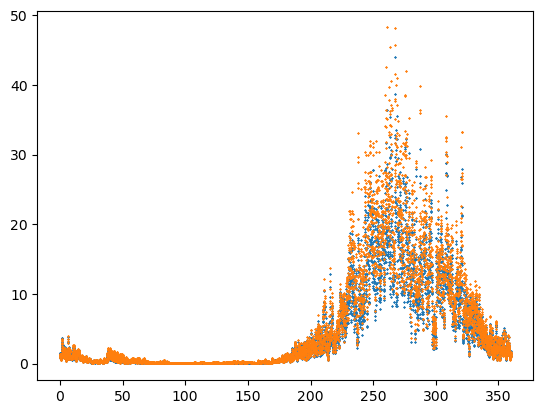

In [75]:
plt.scatter(da.Ls, da[:,4].values, marker = 'x', s = 0.5)
plt.scatter(da.Ls, da[:,5].values, marker = 'x', s = 0.5)